In [16]:
#Created on: Apr 18, 2017
#Author: chen
#llcc2196@gmail.com
import cv2
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [17]:
def lineContours(img):
    ret, binary = cv2.threshold(img,127,255,0) 
    img2, contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
#If you pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored.
    linecontours = np.vstack(contours[2]).squeeze()
    '''
    if len(linecontours) % 2 != 0:
        linecontours = linecontours[:-1]
    contour = np.vsplit(linecontours, 2) 
    '''
    return linecontours

In [18]:
def derivative(point1,point2):
    dpoint = float((point2[1] - point1[1]) / (point2[0] - point1[0])) 
    if math.isinf(dpoint) :
        dpoint = 50
    return dpoint

In [19]:
def lineDerivative(line,step=1,averstep=1):
    dline = []
    for i in range(0,len(line)-averstep,step):
        dline.append(derivative(line[i],line[i + averstep]))
    return dline

In [20]:
def lineCurvature(dline,step=1,averstep=1):
    ddline = []
    for i in range(0,len(dline)-averstep,step):
        ddline.append(dline[i+averstep] - dline[i])
    return ddline

In [21]:
def lineContours(img):
    ret, binary = cv2.threshold(img,127,255,0) 
    img2, contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
#If you pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored.
    linecontours = np.vstack(contours[2]).squeeze()
    '''
    if len(linecontours) % 2 != 0:
        linecontours = linecontours[:-1]
    contour = np.vsplit(linecontours, 2) 
    '''
    return linecontours

In [22]:
#plot the line properties(original image,line,derivative of line,curvature of line),x_axis,y_axis is image size
def plotLineproperties(img,contour,dline,ddline,amplitude = 10,x_axis = 1000,y_axis = 1000):

    plt.subplot(2,2,1),plt.title('original image')
    plt.imshow(img)

    x = contour[:,0]
    y = contour[:,1]
    plt.subplot(2,2,2),plt.title('contour points')
    plt.plot(x,y),plt.axis([0, x_axis, 0, y_axis])

    td = np.arange(0, len(dline))
    plt.subplot(2,2,3),plt.plot(td,dline),plt.title('contour derivative'),plt.axis([0, len(dline), -amplitude, amplitude])

    tdd = np.arange(0, len(ddline))
    plt.subplot(2,2,4),plt.plot(tdd,ddline),plt.title('contour curvature'),plt.axis([0, len(ddline), -amplitude, amplitude])
#    plt.show()
    return 0

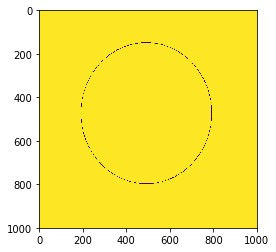

In [28]:
img1 = cv2.imread('circle2-1000.jpeg',0)
plt.imshow(img1)
cnt1 = lineContours(img1)

0.1449771198857409


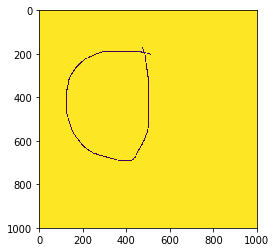

In [29]:
img2 = cv2.imread('circle3-1000.jpeg',0)
plt.imshow(img2)
cnt2 = lineContours(img2)
ret1 = cv2.matchShapes(cnt1,cnt2,1,0.0)
print(ret1)

0.41184775151318076


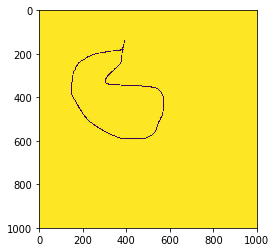

In [30]:
img3 = cv2.imread('circle4-1000.jpeg',0)
plt.imshow(img3)
cnt3 = lineContours(img3)
ret2 = cv2.matchShapes(cnt1,cnt3,1,0.0)
print(ret2)

0.0004422509788433171


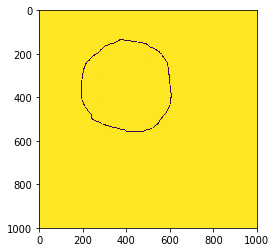

In [31]:
img4 = cv2.imread('circle6-1000.jpeg',0)
plt.imshow(img4)
cnt4 = lineContours(img4)
ret3 = cv2.matchShapes(cnt1,cnt4,1,0.0)
print(ret3)

/home/llcc2196/anaconda3/envs/py3-cv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in int_scalars
  


0

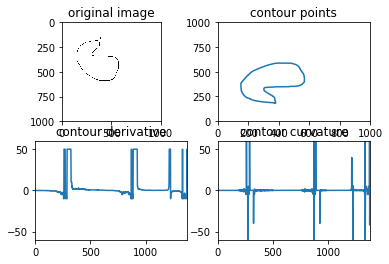

In [32]:
img = cv2.imread('circle4-1000.jpeg',0)
imgori = cv2.imread('circle4-1000.jpeg')
contour = lineContours(img)
dline = lineDerivative(contour,1,10)
ddline = lineCurvature(dline)
plotLineproperties(imgori,contour,dline,ddline,60,1000,1000)